# FINAL PROJECT - PART 10 - FIRST WEB SCRAPING EDA
#### CLEAN AND EDA -  MENTAL HEALTH APPS 

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
app_health=pd.read_csv('/Users/nuria/Documents/datasciencecourse/FINAL PROJECT/Apps_Mental_health_def.csv')

In [3]:
app_health.drop(columns='Unnamed: 0',inplace=True)

In [4]:
app_health

App_name  \
0                           Ejercicios para el cerebro   
1                               Ser feliz Reto 30 días   
2                 Moodpath - Depression & Anxiety Test   
3                                  desordenes mentales   
4    Psicólogos Online, Diario emocional y Mindfulness   
..                                                 ...   
178                           Meditación Guiada Gratis   
179    Control y Monitor: Ansiedad, Ánimo y Autoestima   
180            Pixels - Estados de Ánimo y Mindfulness   
181                          Psicología Positiva Fácil   
182  PSY online terapia psicologia. Сhat apoyo anón...   

                       App_type  App_rate  App_downloads+      App_developer  \
0               Entretenimiento       4.5          100000    ABC Programming   
1                Estilo de vida       4.0          100000         Metta Apps   
2                      Medicina       4.6         1000000     MindDoc Health   
3    Libros y obras de consulta       4.3          100000      Helpful Books   
4             Salud y bienestar       4.3          100000              ifeel   
..                          ...       ...             ...                ...   
178           Salud y bienestar       4.3           10000        AbacaxiApps   
179              Estilo de vida       4.6         1000000        TwoCats App   
180              Estilo de vida       4.7          500000          Teo Vogel   
181           Salud y bienestar       4.1           50000  3Temes Publishers   
182           Salud y bienestar       4.3          500000        INVOLTA INC   

              App_last_update  \
0          7 de abril de 2020   
1         29 de abril de 2020   
2         10 de junio de 2020   
3    17 de septiembre de 2018   
4          1 de junio de 2020   
..                        ...   
178        21 de mayo de 2020   
179        22 de mayo de 2020   
180        8 de junio de 2020   
181   29 de diciembre de 2014   
182       16 de junio de 2020   

                                            App_review  
0    Muy buena !practicar a diario mejora mi atenci...  
1    Maravillosa aplicación!! Agradezco que la haya...  
2    Me gusta mucho, me hace prestar atención a mis...  
3    Excelente trabajo, muy completo y se Puede com...  
4    Se ve genial, y muy bien diseñada. Pero claro,...  
..                                                 ...  
178  Estan muy interesantes las meditaciones guiada...  
179  Esta es de las mejores cosas que me pasó, es u...  
180  me gusta mucho la app, pero estaría bueno que ...  
181  letras muy pequeñas, que se hace imposible lee...  
182  No me permite abrir la app y me gustaría segui...  

[183 rows x 7 columns]

##### Number of Apps per type

- Check what type of apps are the best rated

In [5]:
import plotly.express as px

In [6]:
df_temp=app_health[['App_name','App_type','App_rate','App_downloads+']]

In [7]:
df_temp.drop_duplicates(inplace=True)

In [8]:
df_temp.reset_index(drop=True, inplace=True)

In [9]:
#this is the name of the Dataset I'm going to use to plot info about the health apps 
Health_apps=df_temp.copy()

In [10]:
Health_apps.head(1)

App_name         App_type  App_rate  App_downloads+
0  Ejercicios para el cerebro  Entretenimiento       4.5          100000

In [11]:
Health_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App_name        50 non-null     object 
 1   App_type        50 non-null     object 
 2   App_rate        50 non-null     float64
 3   App_downloads+  50 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [12]:
Health_apps['frequency'] = Health_apps['App_type'].map(Health_apps['App_type'].value_counts())

In [13]:
#get the frequency for each type of app
df_temp2=Health_apps.groupby('App_type')['frequency'].count().reset_index()

In [14]:
df_temp2

App_type  frequency
0                   Educación          1
1             Entretenimiento          1
2              Estilo de vida         10
3  Libros y obras de consulta          1
4                    Medicina          5
5         Noticias y revistas          1
6      Preguntas y respuestas          1
7           Salud y bienestar         30

In [15]:
fig = px.bar(df_temp2, x='App_type',y='frequency',text='frequency',color='App_type',
            height=400)
fig.show()

##### Best rated Apps

In [16]:
#when trying to sort the apps by the number of downloads I have a problem because there 
#there are two apps with the same name developed by different developers.
#to solve it I'm going to add nexto the app's name the developer so I will have two 
#different inputs

app_health[app_health.App_name=='Salud Mental']

App_name           App_type  App_rate  App_downloads+  App_developer  \
22   Salud Mental  Salud y bienestar       4.6           50000      Charnan.7   
28   Salud Mental  Salud y bienestar       4.6           50000      Charnan.7   
50   Salud Mental  Salud y bienestar       4.6            1000  com.mexiz.app   
96   Salud Mental  Salud y bienestar       4.6           50000      Charnan.7   
146  Salud Mental  Salud y bienestar       4.6            1000  com.mexiz.app   
172  Salud Mental  Salud y bienestar       4.6           50000      Charnan.7   

          App_last_update                                         App_review  
22    17 de enero de 2019  hermosa app. noble precisa y real. sentí que m...  
28    17 de enero de 2019  esta app debería estar en todos los celulares ...  
50   9 de octubre de 2017                                 Me encanto gracias  
96    17 de enero de 2019  Es una app realmente buena, pero aún le queda ...  
146  9 de octubre de 2017  Eh buscado en muchas paginas pero  esta es  bu...  
172   17 de enero de 2019  me parece una aplicacion muy interesante llena...

In [17]:
# change the name of the apps
app_health.iloc[22,0]='Salud Mental by Charnan.7'
app_health.iloc[28,0]='Salud Mental by Charnan.7'
app_health.iloc[50,0]='Salud Mental by com.mexiz.app'
app_health.iloc[96,0]='Salud Mental by Charnan.7'
app_health.iloc[146,0]='Salud Mental by com.mexiz.app'
app_health.iloc[172,0]='Salud Mental by Charnan.7'

In [18]:
App_unique=app_health.groupby('App_name')['App_rate'].unique().reset_index()

In [19]:
App_sort_by_rate= App_unique.sort_values(by='App_rate', ascending=False)

In [20]:
type(App_sort_by_rate.App_rate)

pandas.core.series.Series

In [21]:
App_sort_by_rate

App_name App_rate
20  Lojong: Meditación y Mindfulness -Ansiedad +Sueño    [4.9]
8                             Cíngulo: Terapia Guiada    [4.9]
37                      Pura Mente: Meditar es simple    [4.8]
19  La Mente es Maravillosa - Psicología y relaciones    [4.8]
21       Medita con Petit BamBou: mindfulness y sueño    [4.7]
32            Pixels - Estados de Ánimo y Mindfulness    [4.7]
15          Eleva tu Autoestima y Superación Personal    [4.7]
45         Siente - Mindfulness y psicología positiva    [4.7]
25     MoodSpace - Ayuda para el estrés y la ansiedad    [4.7]
27  Música para la meditación, para estrés y ansiedad    [4.7]
34                         Psicologia de la Depresión    [4.7]
48                   Wysa: tu entrenador de felicidad    [4.7]
7     Control y Monitor: Ansiedad, Ánimo y Autoestima    [4.6]
6                                      Como Ser Feliz    [4.6]
40                          Salud Mental by Charnan.7    [4.6]
41                      Salud Mental by com.mexiz.app    [4.6]
33                                         PsicoTests    [4.6]
26               Moodpath - Depression & Anxiety Test    [4.6]
23       Mejor con Salud - Belleza, dieta y bienestar    [4.5]
16                               Fabulous: ¡Motívame!    [4.5]
18           Isotonos - Relajación, Meditación, Salud    [4.5]
13                               El Poder de la mente    [4.5]
11                         Ejercicios para el cerebro    [4.5]
9                                 Desordenes mentales    [4.5]
31                           Paradym: mental wellness    [4.5]
17                      Inteligencia emocional gratis    [4.4]
5                            Calm: Meditación y Sueño    [4.4]
2                AtentaMente - Meditación y Felicidad    [4.4]
44             Serenmind: tu app de ayuda psicológica    [4.3]
38                      Remente - Desarrollo personal    [4.3]
36  Psicólogos Online, Diario emocional y Mindfulness    [4.3]
46                         Smylife - Felicidad diaria    [4.3]
49                                desordenes mentales    [4.3]
30  PSY online terapia psicologia. Сhat apoyo anón...    [4.3]
22                           Meditación Guiada Gratis    [4.3]
10       Diario de animo y preguntas (anti depresión)    [4.3]
29                                       PNL práctico    [4.3]
14                                       El Psicólogo    [4.3]
4     Bambú 🍃 Meditación guiada y sonidos para dormir    [4.2]
3                       Autoestima, el verdadero amor    [4.2]
24                                Mental Health Tests    [4.1]
28  PD Test - Prueba de Trastornos de la Personalidad    [4.1]
35                          Psicología Positiva Fácil    [4.1]
1                                   Ansiedad y estrés    [4.0]
42                                        Salud Savia    [4.0]
43                             Ser feliz Reto 30 días    [4.0]
0   60 Juegos Mentales: Entrenamiento Cerebral Gratis    [4.0]
47                                  Test de Depresión    [3.9]
39                           Salud Mental - psicólogo    [3.0]
12            Ejercicios para mejorar la salud mental    [1.0]

In [22]:
type(App_sort_by_rate.App_rate)

pandas.core.series.Series

In [23]:
#convert the type to float to avoid to have the App_rate in an array format
App_sort_by_rate=App_sort_by_rate.astype({"App_rate":float})

In [24]:
App_sort_by_rate

App_name  App_rate
20  Lojong: Meditación y Mindfulness -Ansiedad +Sueño       4.9
8                             Cíngulo: Terapia Guiada       4.9
37                      Pura Mente: Meditar es simple       4.8
19  La Mente es Maravillosa - Psicología y relaciones       4.8
21       Medita con Petit BamBou: mindfulness y sueño       4.7
32            Pixels - Estados de Ánimo y Mindfulness       4.7
15          Eleva tu Autoestima y Superación Personal       4.7
45         Siente - Mindfulness y psicología positiva       4.7
25     MoodSpace - Ayuda para el estrés y la ansiedad       4.7
27  Música para la meditación, para estrés y ansiedad       4.7
34                         Psicologia de la Depresión       4.7
48                   Wysa: tu entrenador de felicidad       4.7
7     Control y Monitor: Ansiedad, Ánimo y Autoestima       4.6
6                                      Como Ser Feliz       4.6
40                          Salud Mental by Charnan.7       4.6
41                      Salud Mental by com.mexiz.app       4.6
33                                         PsicoTests       4.6
26               Moodpath - Depression & Anxiety Test       4.6
23       Mejor con Salud - Belleza, dieta y bienestar       4.5
16                               Fabulous: ¡Motívame!       4.5
18           Isotonos - Relajación, Meditación, Salud       4.5
13                               El Poder de la mente       4.5
11                         Ejercicios para el cerebro       4.5
9                                 Desordenes mentales       4.5
31                           Paradym: mental wellness       4.5
17                      Inteligencia emocional gratis       4.4
5                            Calm: Meditación y Sueño       4.4
2                AtentaMente - Meditación y Felicidad       4.4
44             Serenmind: tu app de ayuda psicológica       4.3
38                      Remente - Desarrollo personal       4.3
36  Psicólogos Online, Diario emocional y Mindfulness       4.3
46                         Smylife - Felicidad diaria       4.3
49                                desordenes mentales       4.3
30  PSY online terapia psicologia. Сhat apoyo anón...       4.3
22                           Meditación Guiada Gratis       4.3
10       Diario de animo y preguntas (anti depresión)       4.3
29                                       PNL práctico       4.3
14                                       El Psicólogo       4.3
4     Bambú 🍃 Meditación guiada y sonidos para dormir       4.2
3                       Autoestima, el verdadero amor       4.2
24                                Mental Health Tests       4.1
28  PD Test - Prueba de Trastornos de la Personalidad       4.1
35                          Psicología Positiva Fácil       4.1
1                                   Ansiedad y estrés       4.0
42                                        Salud Savia       4.0
43                             Ser feliz Reto 30 días       4.0
0   60 Juegos Mentales: Entrenamiento Cerebral Gratis       4.0
47                                  Test de Depresión       3.9
39                           Salud Mental - psicólogo       3.0
12            Ejercicios para mejorar la salud mental       1.0

In [25]:
df=App_sort_by_rate.head(5)
fig = px.bar(App_sort_by_rate, x='App_name',y='App_rate',text='App_rate',
             width=800, height=400)
fig.show()

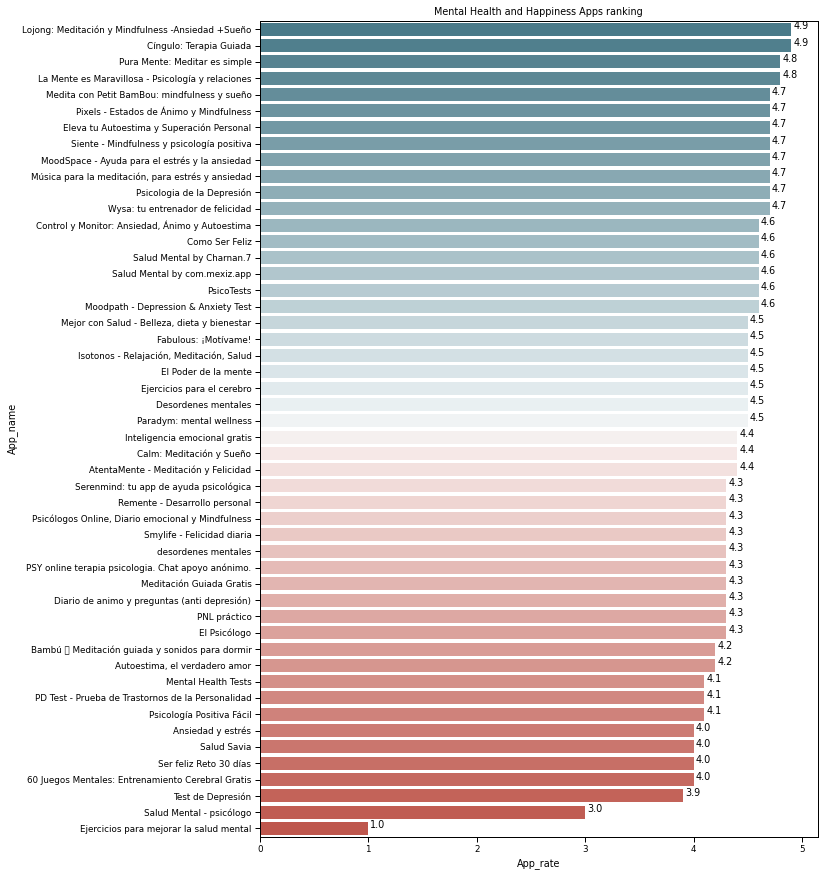

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
cmap=sns.diverging_palette(220, 15, sep=5, n=50)
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x="App_rate", y="App_name", data=App_sort_by_rate, palette=cmap)

for p in ax.patches:
    percentage = percentage = '{:.1f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.title("Mental Health and Happiness Apps ranking")
plt.show()

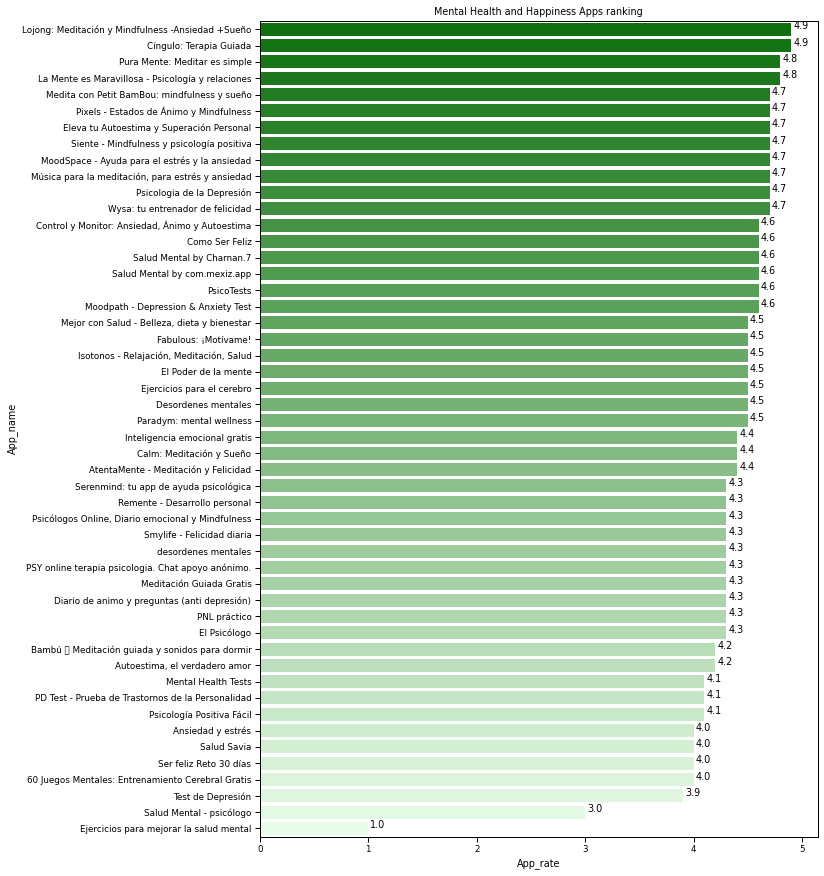

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
cmap=sns.light_palette("green", n_colors=50,reverse=True)
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x="App_rate", y="App_name", data=App_sort_by_rate, palette=cmap)

for p in ax.patches:
    percentage = percentage = '{:.1f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.title("Mental Health and Happiness Apps ranking")
plt.show()

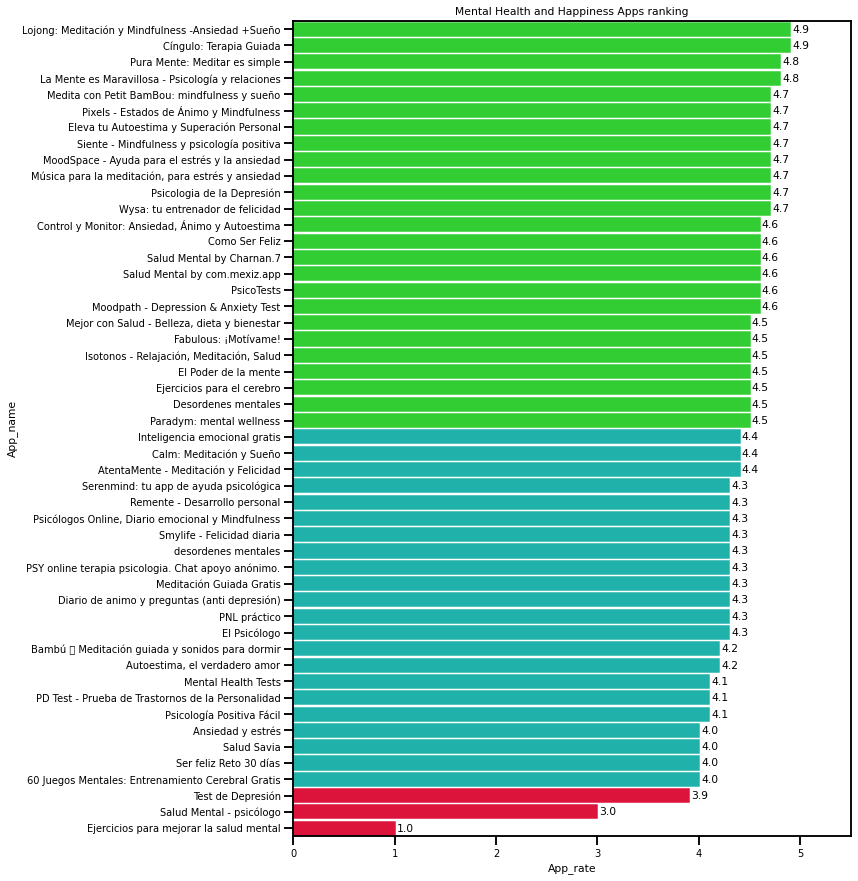

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk",font_scale=0.6)


fig, ax = plt.subplots(figsize=(10,15))

ax = sns.barplot(x="App_rate", y="App_name", data=App_sort_by_rate)
ax.set_xlim(0,5.5)


for bar in ax.patches:
    if bar.get_width() >= 4.5:
        bar.set_color('limegreen')  
    elif bar.get_width() >= 4:
        bar.set_color('lightseagreen')
    elif bar.get_width() < 4:
        bar.set_color('crimson')


for p in ax.patches:
    percentage = percentage = '{:.1f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height-0.2
    ax.annotate(percentage,(x,y))
    

    
plt.title("Mental Health and Happiness Apps ranking")
plt.show()

##### Number of Downloads per App

In [31]:
App_unique_down=app_health.groupby('App_name')['App_downloads+'].unique().reset_index()

In [32]:
App_unique_down.head()

App_name App_downloads+
0  60 Juegos Mentales: Entrenamiento Cerebral Gratis      [5000000]
1                                  Ansiedad y estrés       [100000]
2               AtentaMente - Meditación y Felicidad        [10000]
3                      Autoestima, el verdadero amor       [100000]
4    Bambú 🍃 Meditación guiada y sonidos para dormir        [10000]

In [33]:
type(App_unique_down['App_downloads+'])

pandas.core.series.Series

In [34]:
App_sort_by_down= App_unique_down.sort_values(by='App_downloads+', ascending=False)

In [35]:
App_sort_by_down

App_name App_downloads+
5                            Calm: Meditación y Sueño     [10000000]
0   60 Juegos Mentales: Entrenamiento Cerebral Gratis      [5000000]
16                               Fabulous: ¡Motívame!      [5000000]
8                             Cíngulo: Terapia Guiada      [1000000]
21       Medita con Petit BamBou: mindfulness y sueño      [1000000]
20  Lojong: Meditación y Mindfulness -Ansiedad +Sueño      [1000000]
33                                         PsicoTests      [1000000]
26               Moodpath - Depression & Anxiety Test      [1000000]
7     Control y Monitor: Ansiedad, Ánimo y Autoestima      [1000000]
48                   Wysa: tu entrenador de felicidad      [1000000]
10       Diario de animo y preguntas (anti depresión)       [500000]
38                      Remente - Desarrollo personal       [500000]
14                                       El Psicólogo       [500000]
32            Pixels - Estados de Ánimo y Mindfulness       [500000]
30  PSY online terapia psicologia. Сhat apoyo anón...       [500000]
42                                        Salud Savia       [100000]
1                                   Ansiedad y estrés       [100000]
34                         Psicologia de la Depresión       [100000]
43                             Ser feliz Reto 30 días       [100000]
45         Siente - Mindfulness y psicología positiva       [100000]
29                                       PNL práctico       [100000]
47                                  Test de Depresión       [100000]
27  Música para la meditación, para estrés y ansiedad       [100000]
36  Psicólogos Online, Diario emocional y Mindfulness       [100000]
25     MoodSpace - Ayuda para el estrés y la ansiedad       [100000]
24                                Mental Health Tests       [100000]
13                               El Poder de la mente       [100000]
3                       Autoestima, el verdadero amor       [100000]
6                                      Como Ser Feliz       [100000]
9                                 Desordenes mentales       [100000]
11                         Ejercicios para el cerebro       [100000]
23       Mejor con Salud - Belleza, dieta y bienestar       [100000]
49                                desordenes mentales       [100000]
18           Isotonos - Relajación, Meditación, Salud       [100000]
19  La Mente es Maravillosa - Psicología y relaciones       [100000]
37                      Pura Mente: Meditar es simple        [50000]
35                          Psicología Positiva Fácil        [50000]
40                          Salud Mental by Charnan.7        [50000]
28  PD Test - Prueba de Trastornos de la Personalidad        [10000]
2                AtentaMente - Meditación y Felicidad        [10000]
22                           Meditación Guiada Gratis        [10000]
46                         Smylife - Felicidad diaria        [10000]
4     Bambú 🍃 Meditación guiada y sonidos para dormir        [10000]
15          Eleva tu Autoestima y Superación Personal        [10000]
17                      Inteligencia emocional gratis        [10000]
44             Serenmind: tu app de ayuda psicológica         [5000]
39                           Salud Mental - psicólogo         [1000]
31                           Paradym: mental wellness         [1000]
41                      Salud Mental by com.mexiz.app         [1000]
12            Ejercicios para mejorar la salud mental          [100]

In [36]:
#convert the column App_downloads into integer to avoid to have an array format
App_sort_by_down=App_sort_by_down.astype({"App_downloads+":int})

In [59]:
App_sort_by_down

App_name  App_downloads+
5                            Calm: Meditación y Sueño        10000000
0   60 Juegos Mentales: Entrenamiento Cerebral Gratis         5000000
16                               Fabulous: ¡Motívame!         5000000
8                             Cíngulo: Terapia Guiada         1000000
21       Medita con Petit BamBou: mindfulness y sueño         1000000
20  Lojong: Meditación y Mindfulness -Ansiedad +Sueño         1000000
33                                         PsicoTests         1000000
26               Moodpath - Depression & Anxiety Test         1000000
7     Control y Monitor: Ansiedad, Ánimo y Autoestima         1000000
48                   Wysa: tu entrenador de felicidad         1000000
10       Diario de animo y preguntas (anti depresión)          500000
38                      Remente - Desarrollo personal          500000
14                                       El Psicólogo          500000
32            Pixels - Estados de Ánimo y Mindfulness          500000
30  PSY online terapia psicologia. Сhat apoyo anón...          500000
42                                        Salud Savia          100000
1                                   Ansiedad y estrés          100000
34                         Psicologia de la Depresión          100000
43                             Ser feliz Reto 30 días          100000
45         Siente - Mindfulness y psicología positiva          100000
29                                       PNL práctico          100000
47                                  Test de Depresión          100000
27  Música para la meditación, para estrés y ansiedad          100000
36  Psicólogos Online, Diario emocional y Mindfulness          100000
25     MoodSpace - Ayuda para el estrés y la ansiedad          100000
24                                Mental Health Tests          100000
13                               El Poder de la mente          100000
3                       Autoestima, el verdadero amor          100000
6                                      Como Ser Feliz          100000
9                                 Desordenes mentales          100000
11                         Ejercicios para el cerebro          100000
23       Mejor con Salud - Belleza, dieta y bienestar          100000
49                                desordenes mentales          100000
18           Isotonos - Relajación, Meditación, Salud          100000
19  La Mente es Maravillosa - Psicología y relaciones          100000
37                      Pura Mente: Meditar es simple           50000
35                          Psicología Positiva Fácil           50000
40                          Salud Mental by Charnan.7           50000
28  PD Test - Prueba de Trastornos de la Personalidad           10000
2                AtentaMente - Meditación y Felicidad           10000
22                           Meditación Guiada Gratis           10000
46                         Smylife - Felicidad diaria           10000
4     Bambú 🍃 Meditación guiada y sonidos para dormir           10000
15          Eleva tu Autoestima y Superación Personal           10000
17                      Inteligencia emocional gratis           10000
44             Serenmind: tu app de ayuda psicológica            5000
39                           Salud Mental - psicólogo            1000
31                           Paradym: mental wellness            1000
41                      Salud Mental by com.mexiz.app            1000
12            Ejercicios para mejorar la salud mental             100

In [ ]:
#PLOT THE APPS SORTEF BY THE NUMBER OF DOWNLOADS

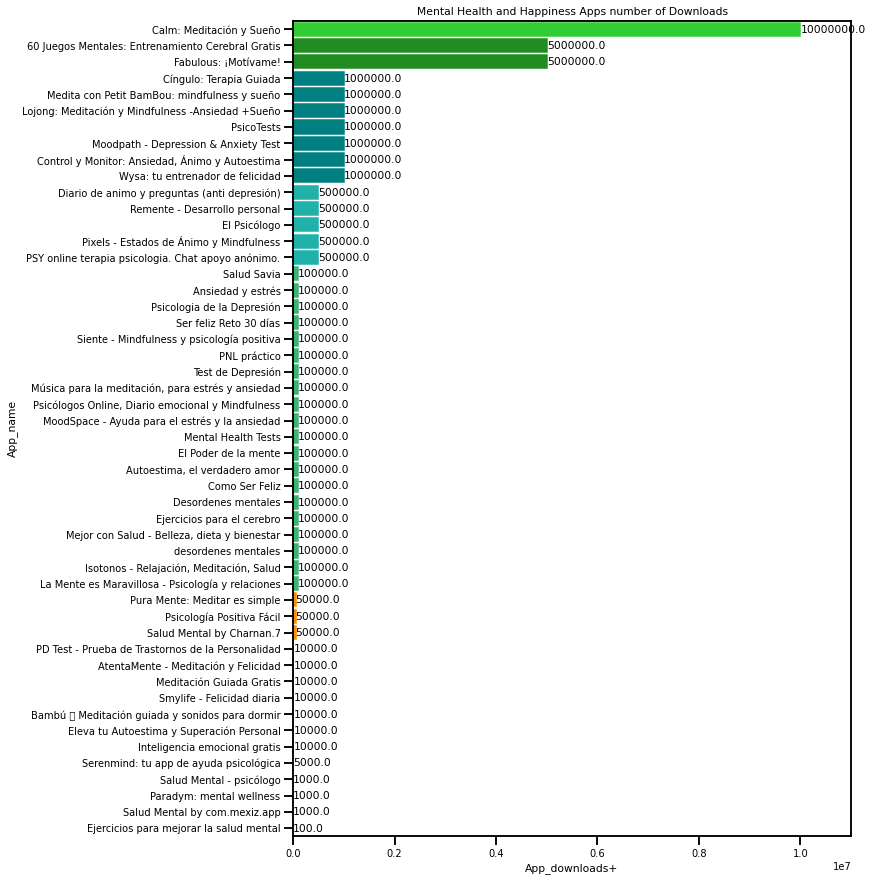

In [50]:
sns.set_context("talk",font_scale=0.6)


fig, ax = plt.subplots(figsize=(10,15))

ax = sns.barplot(x="App_downloads+", y="App_name", data=App_sort_by_down)
ax.set_xlim(0,1.1e7)


for bar in ax.patches:
    if bar.get_width() == 1.0e7:
        bar.set_color('limegreen')  
    elif bar.get_width() == 0.5e7:
        bar.set_color('forestgreen')
    elif bar.get_width() == 0.1e7:
        bar.set_color('teal')
    elif bar.get_width() == 500000:
        bar.set_color('lightseagreen')
    elif bar.get_width() == 100000:
        bar.set_color('mediumseagreen')
    elif bar.get_width() == 50000:
        bar.set_color('darkorange')


for p in ax.patches:
    percentage = percentage = '{:.1f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height-0.2
    ax.annotate(percentage,(x,y))
    

    
plt.title("Mental Health and Happiness Apps number of Downloads")
plt.show()

##### Correlation between Ratings and number of Downloads


In [51]:
app_health.head()

App_name  \
0                         Ejercicios para el cerebro   
1                             Ser feliz Reto 30 días   
2               Moodpath - Depression & Anxiety Test   
3                                desordenes mentales   
4  Psicólogos Online, Diario emocional y Mindfulness   

                     App_type  App_rate  App_downloads+    App_developer  \
0             Entretenimiento       4.5          100000  ABC Programming   
1              Estilo de vida       4.0          100000       Metta Apps   
2                    Medicina       4.6         1000000   MindDoc Health   
3  Libros y obras de consulta       4.3          100000    Helpful Books   
4           Salud y bienestar       4.3          100000            ifeel   

            App_last_update                                         App_review  
0        7 de abril de 2020  Muy buena !practicar a diario mejora mi atenci...  
1       29 de abril de 2020  Maravillosa aplicación!! Agradezco que la haya...  
2       10 de junio de 2020  Me gusta mucho, me hace prestar atención a mis...  
3  17 de septiembre de 2018  Excelente trabajo, muy completo y se Puede com...  
4        1 de junio de 2020  Se ve genial, y muy bien diseñada. Pero claro,...

In [56]:
#create a dataframe with the columns that I want to plit in the scatterplot
cols_to_get=['App_type','App_rate','App_downloads+']
corr_df=app_health[cols_to_get]

In [90]:
# Plot a scatter plot with Plotly
fig = px.scatter(app_health, x="App_rate", y="App_downloads+", color="App_type",hover_data=['App_name'])


fig.update_layout(
    title="Correlation between Rates and number of Downloads",
    xaxis_title="Rates",
    yaxis_title="Number of Downloads",
)

fig.show()

In [89]:
# Plot a scatter plot with Plotly adding anotations in the plot
fig = px.scatter(app_health, x="App_rate", y="App_downloads+", color="App_type",hover_data=['App_name'])

fig.add_annotation(
            x=4.4,
            y=1.0e7,
            text="Calm: Meditación y sueño, rate 4.4, 10M")
fig.add_annotation(
            x=1,
            y=100,
            text="Ej. para mejorar la salud mental, rate 1, 100")
fig.update_annotations(dict(
            xref="x",
            yref="y",
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-40
))

fig.update_layout(
    title="Correlation between Rates and number of Downloads",
    xaxis_title="Rates",
    yaxis_title="Number of Downloads")

fig.show()